In [4]:
import gym
import numpy as np

In [5]:

env = gym.make('FrozenLake-v0')

[2017-04-24 22:41:08,675] Making new env: FrozenLake-v0


In [6]:
# QTABLE

In [7]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n,env.action_space.n])

In [8]:
lr = .85
y = .99

In [9]:
num_episodes = 2000

In [10]:
rList = []

In [11]:
for i in range(num_episodes):
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        j+=1
        #Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state and reward from environment
        s1,r,d,_ = env.step(a)
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    #jList.append(j)
    rList.append(rAll)

In [12]:
print("Score over time: " +  str(sum(rList)/num_episodes))

Score over time: 0.3595


In [13]:
print("Final Q-Table Values")
print(Q)

Final Q-Table Values
[[  1.85361831e-02   9.60600188e-03   3.41151971e-01   3.87774678e-03]
 [  1.70738947e-03   8.68626286e-03   3.51924223e-04   1.92831215e-01]
 [  1.47007169e-02   3.42344965e-03   7.04025205e-03   1.64552099e-01]
 [  3.49943951e-04   8.45615236e-04   2.97888508e-04   1.27785820e-01]
 [  5.36230226e-01   4.10605478e-03   1.96292457e-03   4.77946673e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  6.60198242e-05   1.51145578e-06   1.76620241e-02   1.21389803e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  3.04856747e-04   9.05153274e-04   8.89124206e-04   2.80518658e-01]
 [  2.12679797e-03   7.46374697e-02   9.14141567e-05   4.39941628e-03]
 [  1.16584963e-01   2.64050494e-03   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   4.04743869e-04   7.22177531e-01   0

In [18]:
# visualization
import matplotlib.pyplot as plt

Action_0


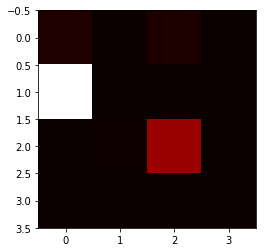

Action_1


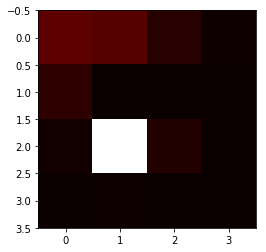

Action_2


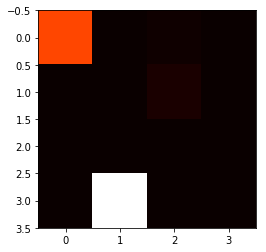

Action_3


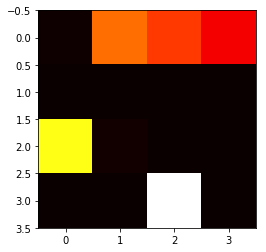

In [30]:
for i in range(4):
    print("Action_" + str(i))
    Q_layer = Q[:,i].reshape(4,4)
    plt.imshow(Q_layer, cmap='hot', interpolation='nearest')
    plt.show()